# Customer Churn Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\PYTHON\Customer Churn\Customer-Churn-Records.csv")

#### Metadata of the Dataset

In [3]:
MetaData = {
    "RowNumber": "Unique identifier of each row",
    "CustomerId": "Customer Id",
    "Surname": "Surname of a Customer",
    "CreditScore": "Customer Creditworthiness to repay debts responsibly",
    "Geography": "Country where Customer lives",
    "Gender": "Customer Gender",
    "Age": "Age of Customer",
    "Tenure": "Number of years a customer has been with the bank",
    "Balance": "Amount of money a customer has in their account",
    "NumOfProducts": "How many products a customer has with the bank",
    "HasCrCard": "Has credit card [0,1]",
    "IsActiveMember": "Whether customer is active or not [0,1]",
    "EstimatedSalary": "Estimated annual salary",
    "Exited": "Whether customer has left the bank or not [0,1]",
    "Complain": "Has customer raised a complaint against any issue [0,1]",
    "Satisfaction Score": "Customer rating [1-5]",
    "Card Type": "Type of card a customer holds ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']",
    "Point Earned": "Loyalty or reward points earned by customer based on their engagement"
}
pd.Series(MetaData).reset_index().rename(columns={'index': 'Column', 0: 'Description'})

,Column,Description
0,RowNumber,Unique identifier of each row
1,CustomerId,Customer Id
2,Surname,Surname of a Customer
3,CreditScore,Customer Creditworthiness to repay debts respo...
4,Geography,Country where Customer lives
5,Gender,Customer Gender
6,Age,Age of Customer
7,Tenure,Number of years a customer has been with the bank
8,Balance,Amount of money a customer has in their account
9,NumOfProducts,How many products a customer has with the bank


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Above is the Bank Customer Dataset

In [5]:
print(f'Over all count of Customers {df.CustomerId.count()}')
print(f'Count of Unique Customers {df.CustomerId.nunique()}')

Over all count of Customers 10000
Count of Unique Customers 10000


#### CustomerId uniquely identifies each customer and serves as the primary key of the dataset

### Total Churn and Retention Rate

In [6]:
a = (df['Exited'].value_counts() / len(df)) * 100
a.index = ['Retention Rate', 'Churn Rate']
a = a.map(lambda x: f"{x:.2f}%")
a

Retention Rate    79.62%
Churn Rate        20.38%
Name: Exited, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### There is no missing values in any of the fields, All the fields are complete, clean and consistent.

## Geography

CustomerId         ChurnRate
Exited      Retained Exited           
Geography                             
France          4203    811  16.174711
Germany         1695    814  32.443204
Spain           2064    413  16.673395

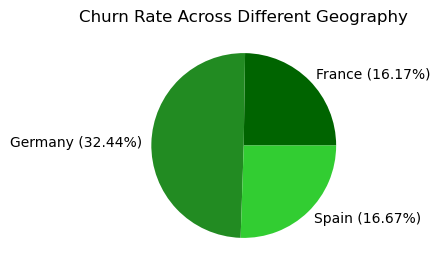

In [9]:
Country = pd.pivot_table(data=df, index='Geography', columns='Exited', aggfunc={'CustomerId': 'count'})
Country = Country.rename(columns={0: 'Retained', 1: 'Exited'})
Country['ChurnRate']=(Country[('CustomerId','Exited')]/(Country[('CustomerId', 'Retained')]
                                                      +Country[('CustomerId',   'Exited')]))*100
counts = Country.ChurnRate.round(2)
labels= [f'{i} ({rate}%)' for i,rate in zip(counts.index,counts)]
plt.figure(figsize=(5,3))
plt.pie(counts, labels=labels ,colors=['#006400', '#228B22', '#32CD32'])
plt.title('Churn Rate Across Different Geography')
Country

#### Germany Reflects higher churn rate

## Age

Text(0.5, 1.0, 'Frequency Distribution of Retained Customer ')

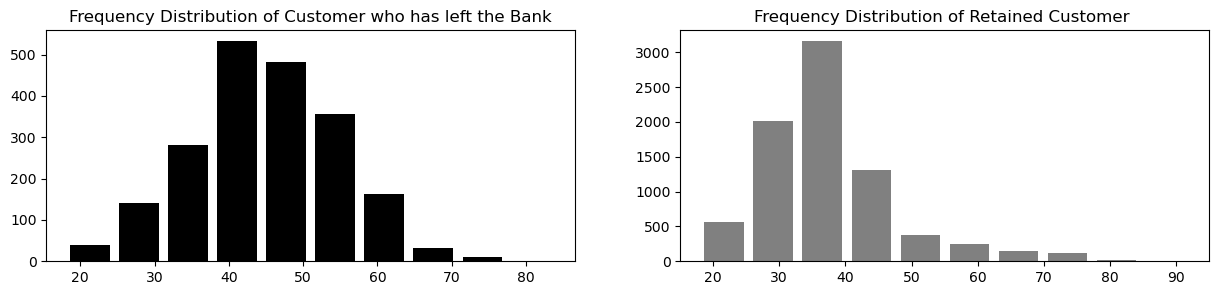

In [10]:
fig,axis = plt.subplots(1,2,figsize=(15,3))
axis[0].hist(df.Age[df['Exited'] == 1], bins=10, rwidth=0.8,color='black')
axis[1].hist(df.Age[df['Exited'] == 0], bins=10, rwidth=0.8,color='gray')
axis[0].set_title("Frequency Distribution of Customer who has left the Bank")
axis[1].set_title("Frequency Distribution of Retained Customer ")

#### Customers aged between 40 to 50 are more likely to leave the bank compared to other age groups, while customers aged between 20 to 40 shows higher retention.

## Customer Activity

CustomerId         ChurnRate
Exited     Retained Exited           
Inactive       3546   1303  26.871520
Active         4416    735  14.269074

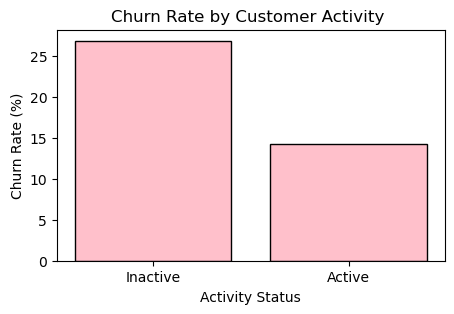

In [11]:
IsActiveMember = pd.pivot_table(data=df, index='IsActiveMember', columns='Exited', aggfunc={'CustomerId': 'count'})
IsActiveMember = IsActiveMember.rename(columns={0: 'Retained', 1: 'Exited'})
IsActiveMember.index=['Inactive','Active']
IsActiveMember['ChurnRate']=(IsActiveMember[('CustomerId','Exited')]/(IsActiveMember[('CustomerId', 'Retained')]+
                                                      IsActiveMember[('CustomerId',   'Exited')]))*100

plt.figure(figsize=(5,3))
plt.bar(IsActiveMember.index,IsActiveMember['ChurnRate'],color=['pink'],edgecolor='black')
plt.title('Churn Rate by Customer Activity ')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Activity Status')
IsActiveMember

#### Inactive Cutstomers are most likey to leave the Bank than Active Customers

## Number Of Products 

CustomerId           ChurnRate
Exited   Retained  Exited            
1          3675.0  1409.0   27.714398
2          4241.0   349.0    7.603486
3            46.0   220.0   82.706767
4             0.0    60.0  100.000000

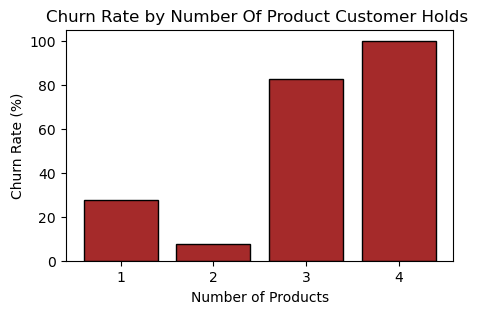

In [12]:
NoOfProducts = pd.pivot_table(data=df, index='NumOfProducts', columns='Exited', aggfunc={'CustomerId': 'count'}).fillna(0)
NoOfProducts = NoOfProducts.rename(columns={0: 'Retained', 1: 'Exited'})
NoOfProducts.index=["1","2","3","4"]
NoOfProducts['ChurnRate']=(NoOfProducts[('CustomerId','Exited')]/(NoOfProducts[('CustomerId', 'Retained')]+
                                                      NoOfProducts[('CustomerId',   'Exited')]))*100

plt.figure(figsize=(5,3))
plt.bar(NoOfProducts.index,NoOfProducts['ChurnRate'],color=['brown'],edgecolor='black')
plt.title('Churn Rate by Number Of Product Customer Holds ')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Products')
NoOfProducts

####  Customers who have opted for 4 number of Products all of them have left the Bank and 82% of people have left the bank who have opted for 3 Number of Products.

## Tenure

In [13]:
Tenure = pd.pivot_table(data=df, index='Tenure', columns='Exited', aggfunc={'CustomerId': 'count'})
Tenure = Tenure.rename(columns={0: 'Retained', 1: 'Exited'})
Tenure['ChurnRate']=(Tenure[('CustomerId','Exited')]/(Tenure[('CustomerId', 'Retained')]
                                                      +Tenure[('CustomerId',   'Exited')]))*100
Tenure

CustomerId         ChurnRate
Exited   Retained Exited           
Tenure                             
0             318     95  23.002421
1             803    232  22.415459
2             847    201  19.179389
3             796    213  21.110010
4             786    203  20.525784
5             803    209  20.652174
6             771    196  20.268873
7             851    177  17.217899
8             828    197  19.219512
9             770    214  21.747967
10            389    101  20.612245

## Satisfaction Rate

In [14]:
SatisfactionScore = pd.pivot_table(data=df, index='Satisfaction Score', columns='Exited', aggfunc={'CustomerId': 'count'})
SatisfactionScore = SatisfactionScore.rename(columns={0: 'Retained', 1: 'Exited'})
SatisfactionScore['ChurnRate']=(SatisfactionScore[('CustomerId','Exited')]/(SatisfactionScore[('CustomerId', 'Retained')]+
                                                      SatisfactionScore[('CustomerId',   'Exited')]))*100
SatisfactionScore

CustomerId         ChurnRate
Exited               Retained Exited           
Satisfaction Score                             
1                        1545    387  20.031056
2                        1575    439  21.797418
3                        1641    401  19.637610
4                        1594    414  20.617530
5                        1607    397  19.810379

## Customer with Credit Card 

In [15]:
HasCrCard = pd.pivot_table(data=df, index='HasCrCard', columns='Exited', aggfunc={'CustomerId': 'count'})
HasCrCard = HasCrCard.rename(columns={0: 'Retained', 1: 'Exited'})
HasCrCard['ChurnRate']=(HasCrCard[('CustomerId','Exited')]/(HasCrCard[('CustomerId', 'Retained')]+
                                                      HasCrCard[('CustomerId',   'Exited')]))*100
HasCrCard

CustomerId         ChurnRate
Exited      Retained Exited           
HasCrCard                             
0               2332    613  20.814941
1               5630   1425  20.198441

## Card Type

In [16]:
CardType = pd.pivot_table(data=df, index='Card Type', columns='Exited', aggfunc={'CustomerId': 'count'})
CardType = CardType.rename(columns={0: 'Retained', 1: 'Exited'})
CardType['ChurnRate']=(CardType[('CustomerId','Exited')]/(CardType[('CustomerId', 'Retained')]+
                                                      CardType[('CustomerId',   'Exited')]))*100
CardType

CustomerId         ChurnRate
Exited      Retained Exited           
Card Type                             
DIAMOND         1961    546  21.779019
GOLD            2020    482  19.264588
PLATINUM        1987    508  20.360721
SILVER          1994    502  20.112179

#### Customer Satisfaction Score [Rating], Tenure, Card Type and Credit Card Status these attributes are not making any potential imapct over the Churn Rate as it has more or less uniform churn distribution. [Churn rate between 17 to 23]

## Credit Score

#### Creating customer categories based on their creditworthiness and ability to repay debt.

In [17]:
def creditscorecat(a):
    if a>=350 and a <= 579:
        return "High Risk"
    elif a>=580 and a <= 669:
        return "Minimal Risk"
    elif a>=670 and a <= 749:
        return "Reliable"
    else:
        return "Very Reliable"

In [18]:
df['Credit Score Category']=df.CreditScore.apply(creditscorecat)

In [19]:
CreditScoreC = pd.pivot_table(data=df, index='Credit Score Category', columns='Exited', aggfunc={'CustomerId': 'count'})
CreditScoreC = CreditScoreC.rename(columns={0: 'Retained', 1: 'Exited'})
CreditScoreC['ChurnRate']=(CreditScoreC[('CustomerId','Exited')]/(CreditScoreC[('CustomerId', 'Retained')]+
                                                      CreditScoreC[('CustomerId',   'Exited')]))*100
CreditScoreC

CustomerId         ChurnRate
Exited                  Retained Exited           
Credit Score Category                             
High Risk                   1842    520  22.015241
Minimal Risk                2646    685  20.564395
Reliable                    2173    511  19.038748
Very Reliable               1301    322  19.839803

## Points Earned

In [20]:
pd.cut(df['Point Earned'],bins=5).unique()

[(295.2, 471.4], (471.4, 647.6], (118.119, 295.2], (647.6, 823.8], (823.8, 1000.0]]
Categories (5, interval[float64, right]): [(118.119, 295.2] < (295.2, 471.4] < (471.4, 647.6] < (647.6, 823.8] < (823.8, 1000.0]]

In [21]:
bins = [118, 295, 471, 648, 824, 1000]
labels = [
    'Very Low Performer',
    'Low Performer',
    'Average Performer',
    'High Performer',
    'Top Performer'
]

df['Performance_Category'] = pd.cut(df['Point Earned'], bins=bins, labels=labels, include_lowest=True)


In [22]:
Performance_Category = pd.pivot_table(data=df, index='Performance_Category', columns='Exited', aggfunc={'CustomerId': 'count'})
Performance_Category = Performance_Category.rename(columns={0: 'Retained', 1: 'Exited'})
Performance_Category['ChurnRate']=(Performance_Category[('CustomerId','Exited')]/(Performance_Category[('CustomerId','Retained')]
                                                                                  +
                                                      Performance_Category[('CustomerId',   'Exited')]))*100
Performance_Category

CustomerId         ChurnRate
Exited                 Retained Exited           
Performance_Category                             
Very Low Performer          793    218  21.562809
Low Performer              1794    451  20.089087
Average Performer          1852    451  19.583152
High Performer             1759    492  21.856952
Top Performer              1764    426  19.452055

#### Both CreditScore and Points Earned by Customers is not efficient enough to explain the Churn.

## Customer Complain Status

CustomerId         ChurnRate
Exited           Retained Exited           
Not Complained       7952      4   0.050277
Complained             10   2034  99.510763

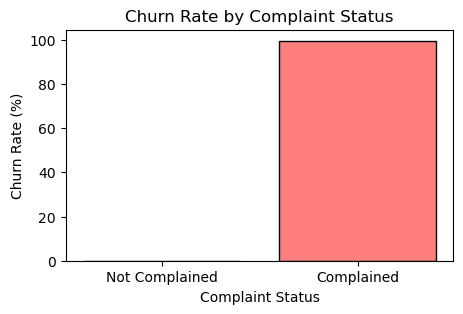

In [23]:
Complain = pd.pivot_table(data=df, index='Complain', columns='Exited', aggfunc={'CustomerId': 'count'})
Complain = Complain.rename(columns={0: 'Retained', 1: 'Exited'})
Complain.index =['Not Complained','Complained']
Complain['ChurnRate']=(Complain[('CustomerId','Exited')]/(Complain[('CustomerId', 'Retained')]+
                                                      Complain[('CustomerId',   'Exited')]))*100
plt.figure(figsize=(5,3))
plt.bar(Complain.index, Complain['ChurnRate'], color=['#90ee90', '#ff7f7f'], edgecolor='black')
plt.title('Churn Rate by Complaint Status')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Complaint Status')

Complain

#### 99% of people who have raised a complain has left the Bank.

## Summary of Exited Customers by complaint status and their respective satisfaction ratings.

In [25]:
Rating = pd.pivot_table(data=df[df.Exited==1], columns='Complain', index=['Satisfaction Score'], aggfunc={'CustomerId': 'count'}).fillna(0)
Rating = Rating.rename(columns={0: 'Not Complained', 1: 'Complained'})
Rating['ChurnRate']=(Rating[('CustomerId','Complained')]/(Rating[('CustomerId', 'Not Complained')]+
                                                      Rating[('CustomerId',   'Complained')]))*100
Rating

CustomerId              ChurnRate
Complain           Not Complained Complained            
Satisfaction Score                                      
1                             1.0      386.0   99.741602
2                             2.0      437.0   99.544419
3                             0.0      401.0  100.000000
4                             1.0      413.0   99.758454
5                             0.0      397.0  100.000000

#### Over 99% of customers who exited had lodged a complaints across all satisfaction score level.

In [26]:
df['Satisfaction Score'].corr(df['Complain'])

-0.004799075066955665

#### Correlation  between  Satisfaction  rate  and  Complain  have  very  low  magnitude,  which  indicate  Despite  high  satisfaction ratings,  some  customers  still  filed  complaints  and  left  the  bank,  indicating  possible  bias  in  the  feedback  system. Redesigning  the  review  and  feedback  platform  could  help  capture  genuine  customer  sentiment  more  effectively.

## Thank you